## Solutore polinomiale (versione con numpy)
Luca Mari, aprile 2023  
[virtenv `nn`: torch, numpy, matplotlib]

Questo solutore approssima funzioni $\mathbb{R} \rightarrow \mathbb{R}$, per esempio $sin(x)$ tra $-\pi$ e $\pi$, mediante un polinomio di grado $n$, di cui stima i parametri.    
Per una documentazione più analitica, vedi il notebook con la versione per `numpy`.

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print(f'Device: {device}')
dtype = torch.float

Device: cuda


Decidi la funzione -- che nella fase di test si supporrà ignota, ovviamente -- da approssimare.

In [7]:
the_fun = lambda x: torch.cos(x)    # la funzione da approssimare
the_min = -np.pi                    # l'argomento minimo
the_max = np.pi                     # l'argomento massimo
num_pts = 1000

x = torch.linspace(the_min, the_max, num_pts, device=device, dtype=dtype)
y = the_fun(x)

Decidi il grado del polinomio, la dimensione del training set e il _learning rate_.

In [8]:
n = 4                           # grado del polinomio approssimante
q = 10000                       # numero di ripetizioni ("epoche") dell'addestramento
lr = 1e-7                       # learning rate

Definisci la funzione di addestramento.

In [9]:
def train(x, y, n1:int, q:int, lr:float, log:bool=False):
    w = torch.randn(size=[n1], device=device, dtype=dtype)
    poly = torch.zeros(size=[n1, len(x)], device=device, dtype=dtype)
    grad = torch.zeros(size=[n1], device=device, dtype=dtype)
    
    if log: print('step\tmse')

    for i in range(q):
        for j in range(n1): poly[j] = x.pow(j)              # forward pass
        y_pred = w.unsqueeze(0) @ poly

        if log:                                             # calcola e visualizza l'errore
            sse = (y_pred - y).pow(2).sum().item()
            if i % 1000 == 0: print(f'{i}\t{sse:.5f}')

        grad_y_pred = 2.0 * (y_pred - y)                    # back propagation
        for j in range(n1): grad[j] = (grad_y_pred * x.pow(j)).sum()

        w -= lr * grad  # aggiorna i pesi
    return w

Esegui il processo di apprendimento, e quindi calcola e visualizza il polinomio, confrontandolo con la funzione da approssimare.

step	mse
0	896975.93750
1000	11523.84570
2000	5502.84277
3000	2729.76685
4000	1435.33496
5000	817.09967
6000	510.56863
7000	349.73004
8000	258.60995
9000	202.14369


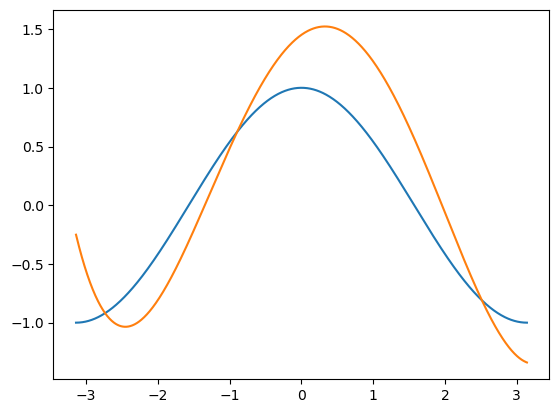

In [10]:
w = train(x, y, n+1, q, lr, True)

yy = torch.zeros(num_pts, device=device, dtype=dtype)
for j in range(n+1): yy += w[j] * x.pow(j)

xx = x.detach().cpu().numpy()
y = y.detach().cpu().numpy()
yy = yy.detach().cpu().numpy()

plt.plot(xx, y)
plt.plot(xx, yy)
plt.show()